###  The classification goal is to predict the likelihood of a liability customer buying personal loans.
<hr>

### EDA

### Import the necessary libraries

In [84]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB


### Read the data as a data frame

In [85]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### Shape of the data

In [86]:
data.shape

(5000, 14)

The dataset has 5000 rows and 14 coulmns

In [87]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking the presence of missing values

In [88]:
# check total nuber of null entries
total_null_entries = pd.DataFrame(data.isnull().sum())
total_null_entries.columns = ['Total']
# total_null_entries.reindex()
total_null_entries.transpose()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<b>No null values in the dataset</b>

### 5 point summary of numerical attributes

In [89]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### 1. Read the column description and ensure you understand each attribute well

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the columns/attributes have 5000 non-null values.

<h4>Feature details</h4>
<table align="left" width="100%">
    <thead>
        <tr>
<!--             <th style="text-align: left" width="10%">Sr</th> -->
            <th style="text-align: left" width="15%">Feature</th>
            <th style="text-align: left" width="15%">Type</th>
            <th style="text-align: left" width="70%">Description</th>
        <tr>
    </thead>
    <tbody>
        <tr>
<!--             <td style="text-align: left" >1</td> -->
            <td style="text-align: left" >ID</td>
            <td style="text-align: left" >Nominal</td>
            <td style="text-align: left" >This is just a customer ID and has no association/relation with any other feature of dataset. We can neglect/skip this information for our model prediction.</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >2</td> -->
            <td style="text-align: left" >Age</td>
            <td style="text-align: left" >Interval</td>
            <td style="text-align: left" >Customer's age in completed years</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >3</td> -->
            <td style="text-align: left" >Experience</td>
            <td style="text-align: left" >Interval</td>
            <td style="text-align: left" >#years of professional experience. There are some negative values (-1, -2, -3)</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >4</td> -->
            <td style="text-align: left" >Income</td>
            <td style="text-align: left" >Interval</td>
            <td style="text-align: left" >Annual income of the customer in dollars</td>
        </tr>
         <tr>
<!--             <td style="text-align: left" >5</td> -->
            <td style="text-align: left" >ZIP Code</td>
            <td style="text-align: left" >Nominal</td>
            <td style="text-align: left" >Home Address ZIP code.</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >6</td> -->
            <td style="text-align: left" >Family</td>
            <td style="text-align: left" >Ordinal</td>
            <td style="text-align: left" >Family size of the customer.</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >7</td> -->
            <td style="text-align: left" >CCAvg</td>
            <td style="text-align: left" >Interval</td>
            <td style="text-align: left" >Avg. spending on credit cards per month in dollars</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >8</td> -->
            <td style="text-align: left" >Education</td>
            <td style="text-align: left" >Ordinal</td>
            <td style="text-align: left" >Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >8</td> -->
            <td style="text-align: left" >Mortgage</td>
            <td style="text-align: left" >Interval</td>
            <td style="text-align: left" >Value of house mortgage if any in dollars</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >9</td> -->
            <td style="text-align: left" >Personal Loan</td>
            <td style="text-align: left" >Binary</td>
            <td style="text-align: left" >Did this customer accept the personal loan offered in the last campaign? This is our <b>target variable.</b></td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >10</td> -->
            <td style="text-align: left" >Securities Account</td>
            <td style="text-align: left" >Binary</td>
            <td style="text-align: left" >Does the customer have a securities account with the bank?</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >11</td> -->
            <td style="text-align: left" >CD Account</td>
            <td style="text-align: left" >Binary</td>
            <td style="text-align: left" >Does the customer have a certificate of deposit (CD) account with the bank?</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >12</td> -->
            <td style="text-align: left" >Online</td>
            <td style="text-align: left" >Binary</td>
            <td style="text-align: left" >Does the customer use internet banking facilities?</td>
        </tr>
        <tr>
<!--             <td style="text-align: left" >13</td> -->
            <td style="text-align: left" >CreditCard</td>
            <td style="text-align: left" >Binary</td>
            <td style="text-align: left" >Does the customer use a credit card issued by UniversalBank?</td>
        </tr>
    </tbody>
</table>

#### Handling negative values of the experience feature

There are total 52 customer records in the dataset which has negative experience. We need to handle this negative values.

In [91]:
# total negative values in experience feature.
negative_exp = data[data.Experience < 0].iloc[0:]
positive_exp = data[data.Experience > 0].iloc[0:]

tn = data[data.Experience < 0].Experience.count()

print(f'Total Negative values: {tn}')

Total Negative values: 52


In [92]:
# replacing negative experince values with the group of same age and education data median. 
for index, row in negative_exp.iterrows():
    ID, Age, Education = int(row.ID), int(row.Age), int(row.Education)
    
    exp = positive_exp[(positive_exp.Age == Age) & (positive_exp.Education == Education)].Experience.median()
    data.loc[data.loc[np.where(data['ID']==ID)].index, 'Experience'] = exp
    # print(f'{ID}-----{Age}-----{Education}-----{exp}\n\n')

# replaching nan value with 0, as there are no group of data having same age and education. 
data.Experience.fillna(0, inplace=True)

In [93]:
tn = data[data.Experience < 0].Experience.count()

print(f'Total Negative values: {tn}')

Total Negative values: 0


#### Unique values in features

In [94]:
unique_values = data.apply(lambda x: len(x.unique())).to_frame()

unique_values.columns = ['Total']
unique_values.reindex()

unique_values.T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Total,5000,45,44,162,467,4,108,3,347,2,2,2,2,2


### 2. Study the data distribution in each attribute, share your findings

Numerical Attributes

In [95]:
def display_chart(col):
    plt.figure(figsize= (20,15))
    
    plt.subplot(3,2,1)
    sns.distplot(data[col],  kde=True, color='#ba2121')
    plt.xlabel(col)

    plt.subplot(3,2,2)
    sns.boxplot(x=data[col], palette = 'cool')
    plt.xlabel(col)

    plt.show()

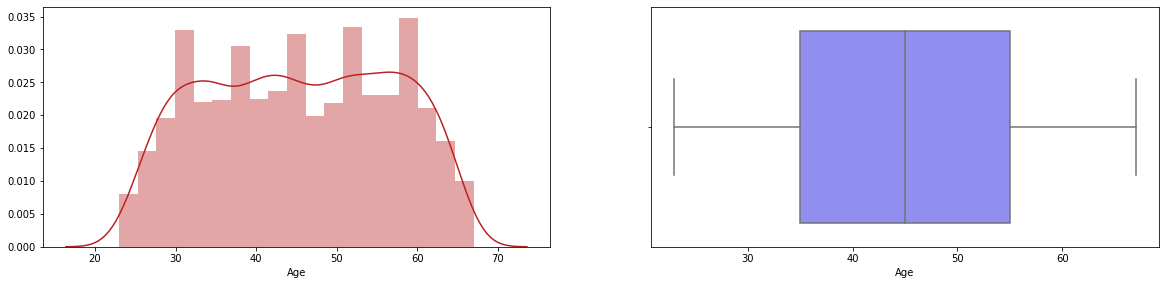

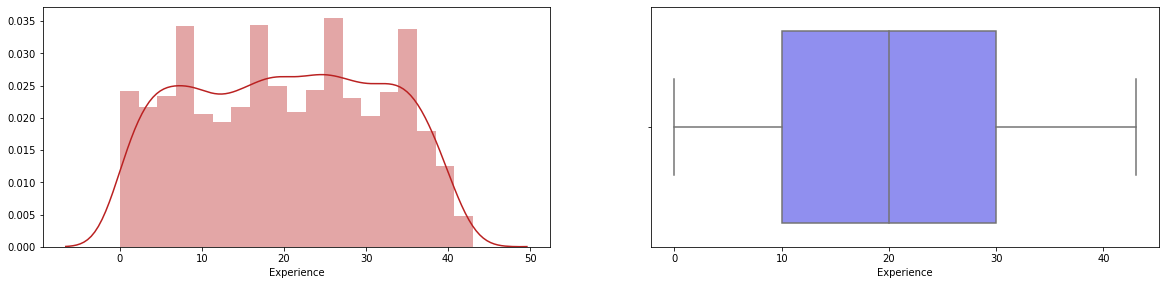

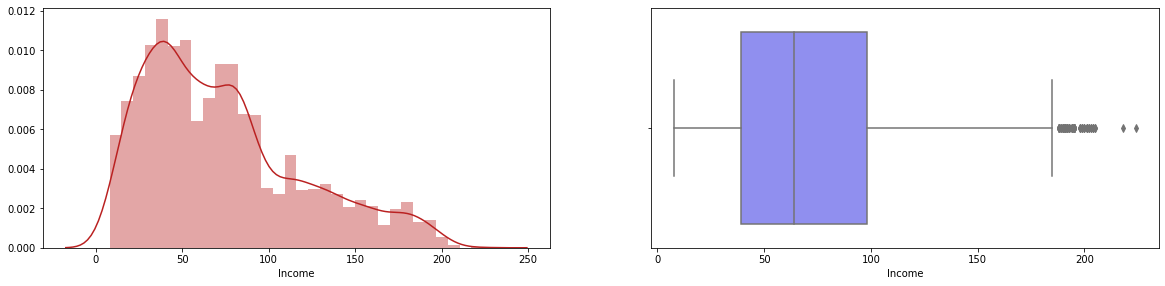

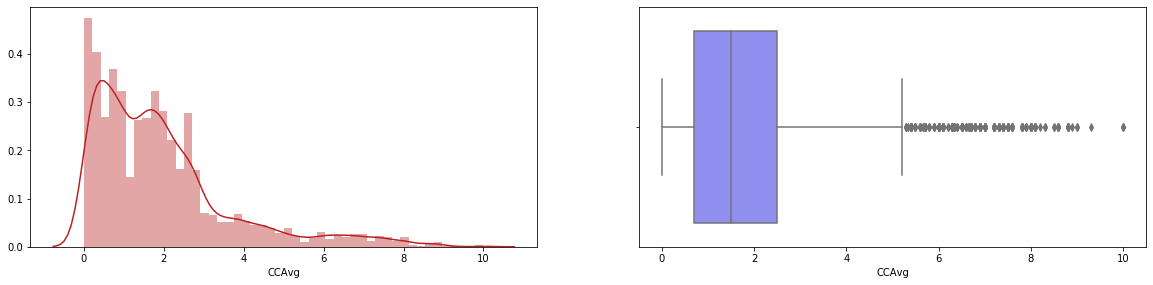

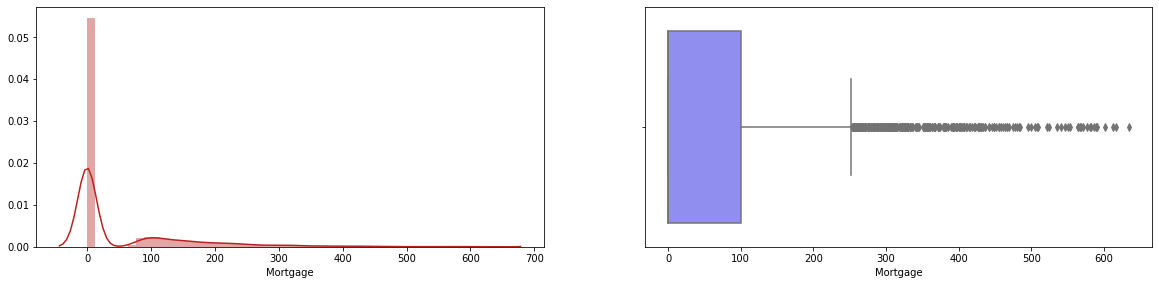

In [96]:
cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

for col in cols:
    display_chart(col)

Categorical Attributes

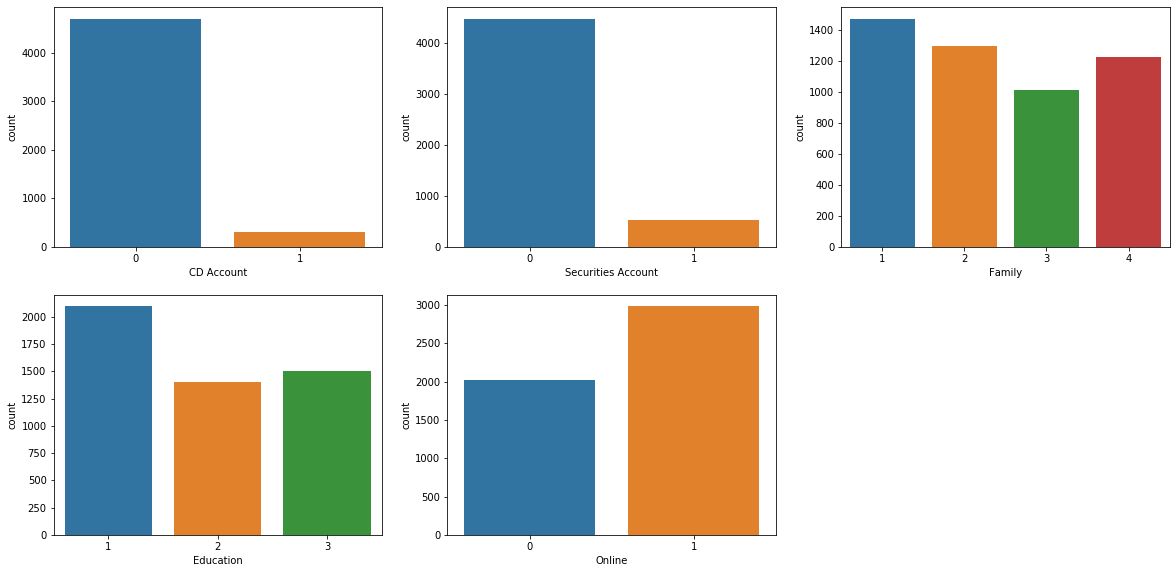

In [97]:
cols = 'CD Account,Securities Account,Family,Education,Online'.split(',')

i =1
plt.figure(figsize= (20,15))
for col in cols:
    plt.subplot(3,3,i)
    sns.countplot(x=data[col])
    i = i +1
        
plt.show()

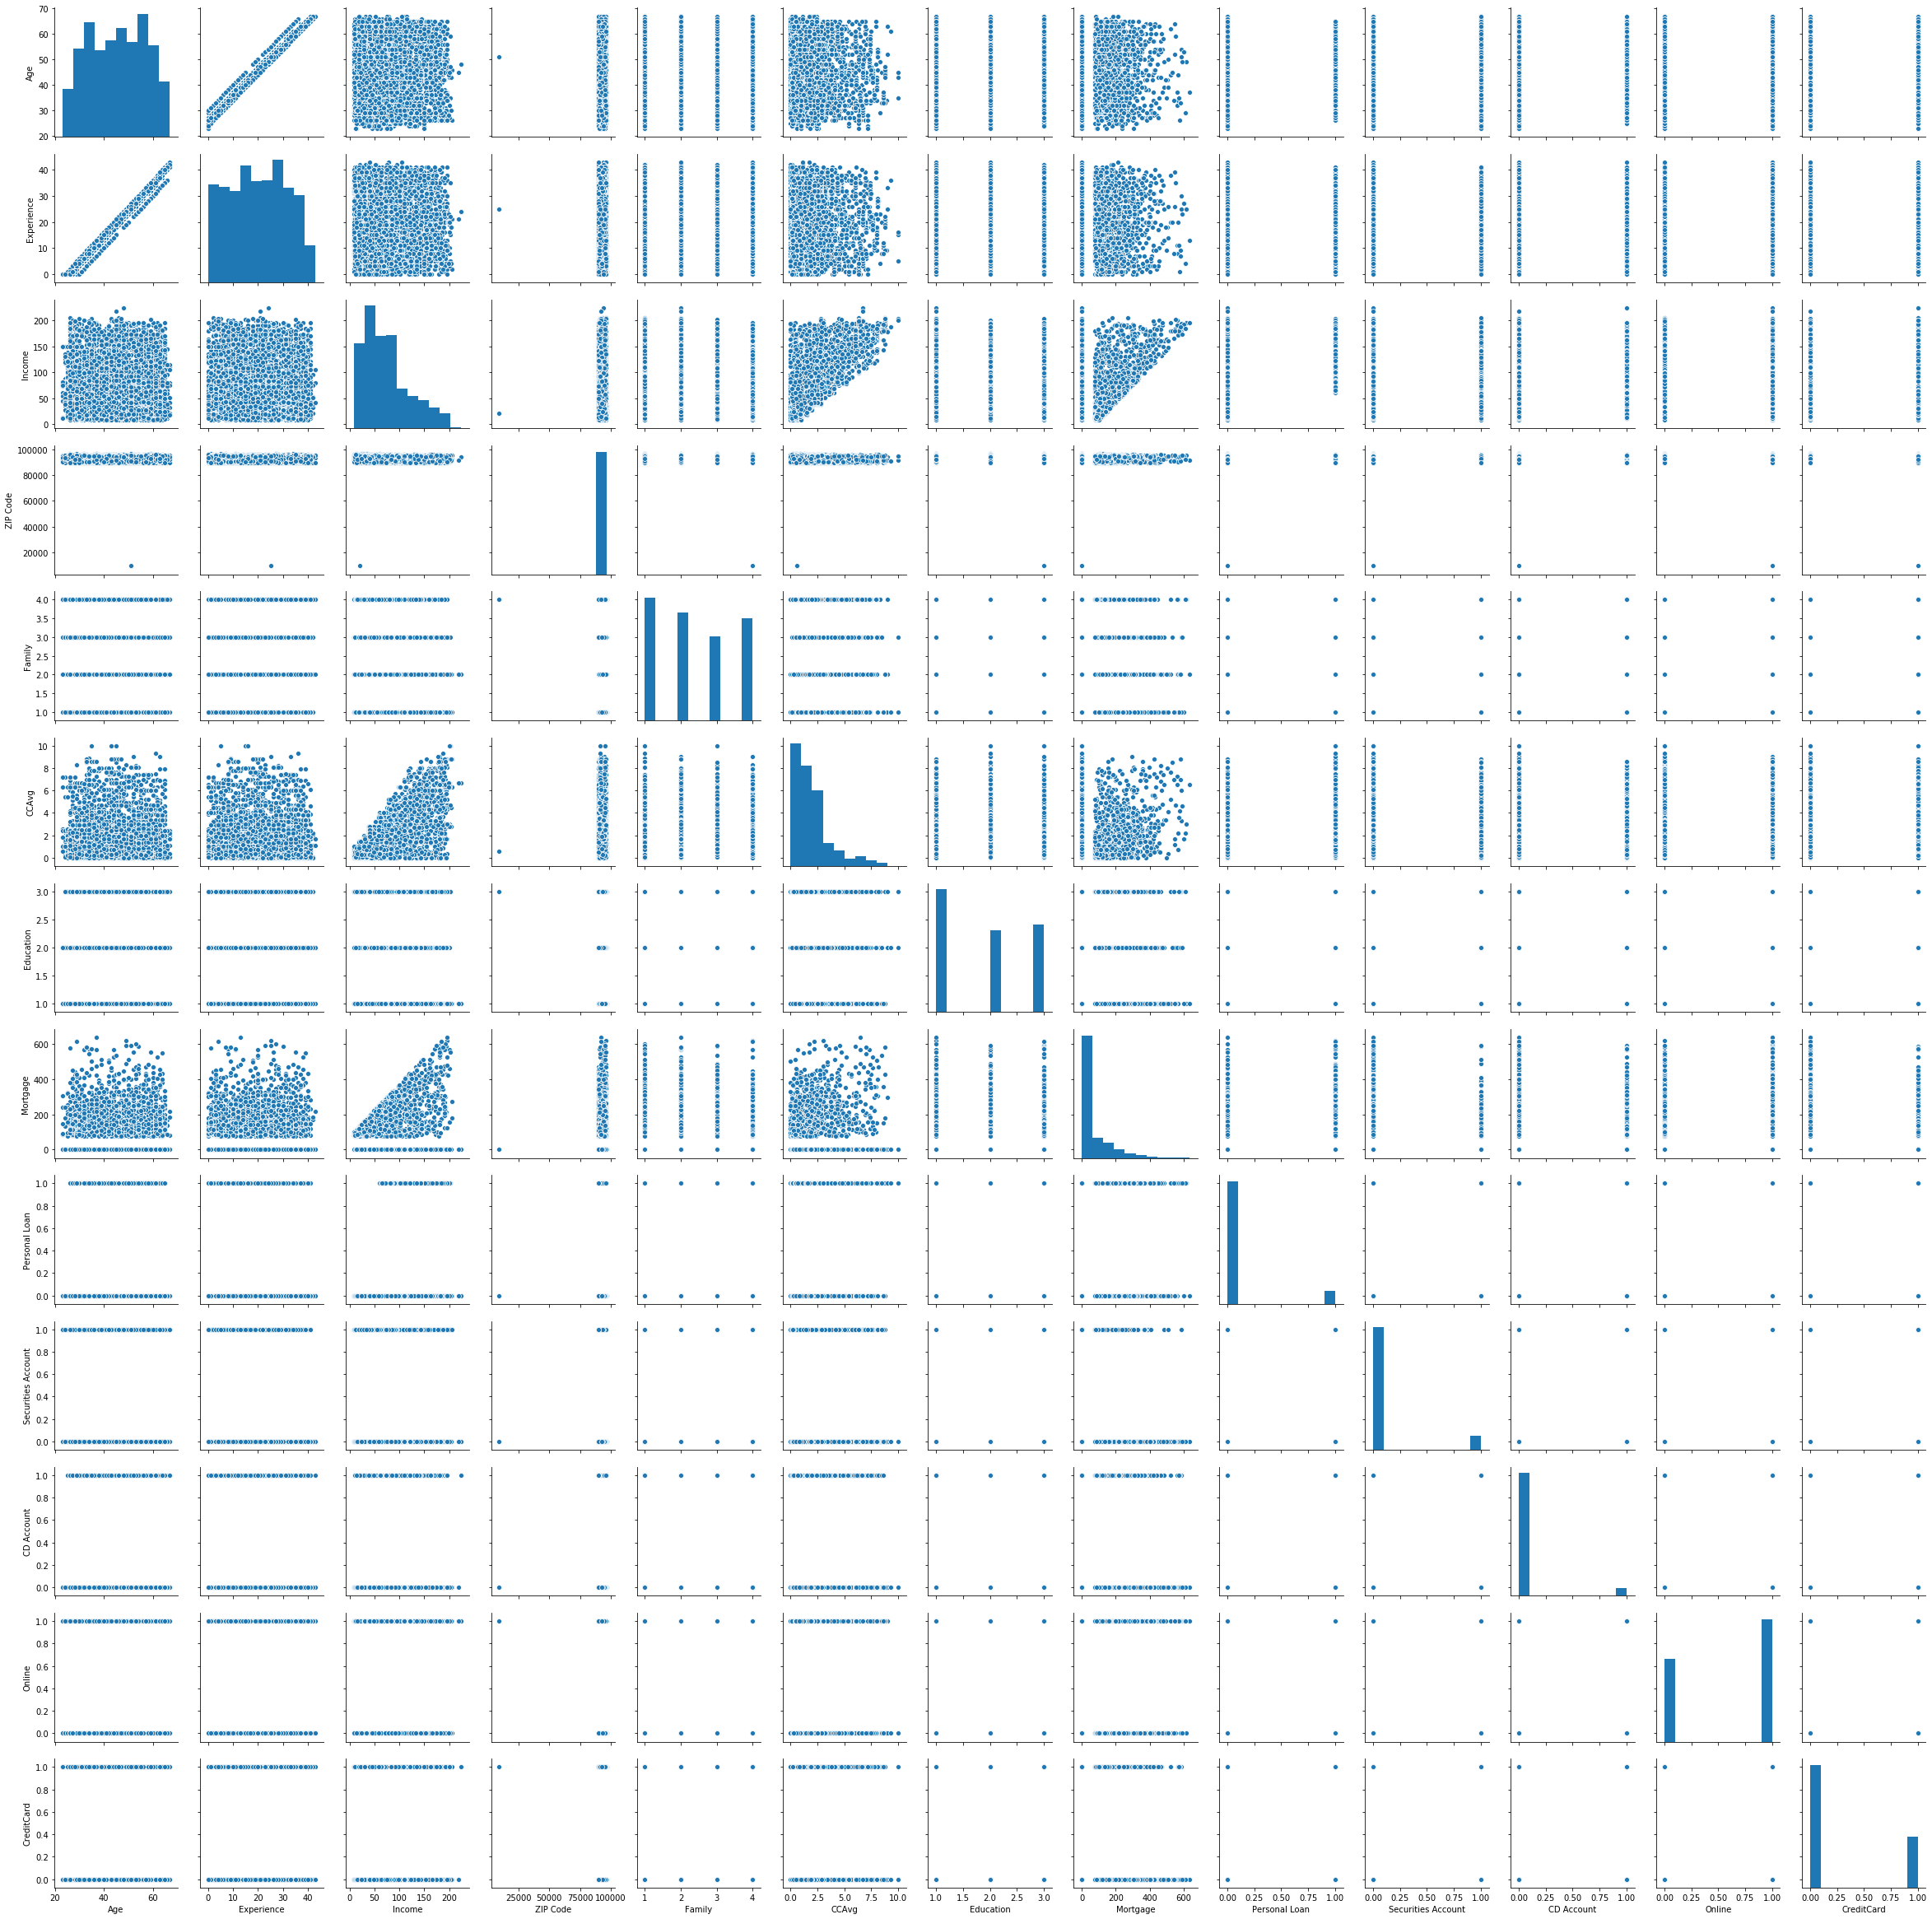

In [98]:
sns.pairplot(data.drop('ID', axis=1))

<h4>Observations</h4>

<b>Age</b> Feature looks normally distributed. Most of the customer looks between 30 t0 60 age group. The mean and median of the attribute is equal.<br/><br/>
<b>Experience</b> Looks like normally distributed. Here the mean is equal to median. Age and Experience is highly corelated.<br/><br/>
<b>Income</b> positivly skewed. Some extreme values.<br/><br/>
<b>Family</b> It has 4 peaks. Families with least member is highest in the sample.<br/><br/>
<b>CCAvg</b> positivly skewed and there are quiet a lot of extreme values. <br/><br/>
<b>Education</b> It has 3 peaks. Data looks normally distributed at each pick.<br/><br/>
<b>CD Account</b> Most of the customers dont have CD accounts.<br/><br/>
<b>Mortgage</b> Most of values are between 0 to 40. Right skewed and there are quiet a lot of extreme values.<br/><br/>
<b>Securities Account</b> This attributes tells us that majorly cutomers are not having Security account.<br/><br/>
<b>Online</b> Higher number of customers are using the online banking<br/><br/>
<b>CreditCard</b> Very less customers are using the credit card.<br/><br/>

In [99]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008207,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994213,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008207,0.994213,1.000000,-0.046862,-0.028607,-0.052097,-0.050021,0.014000,-0.010920,-0.008042,-0.001240,0.009917,0.013828,0.009029
Income,-0.017695,-0.055269,-0.046862,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028607,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052097,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050021,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.014000,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010920,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008042,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


### 3. Get the target column distribution.

In [100]:
distribution = pd.DataFrame(data['Personal Loan'].value_counts())

distribution.index = ['No', 'Yes']
distribution.reindex()

,Personal Loan
No,4520
Yes,480


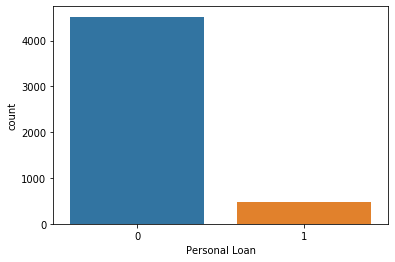

In [101]:
sns.countplot(data['Personal Loan'])

In [102]:
total = data['Personal Loan'].count()
loan_takers = data[data['Personal Loan'] == 1]['Personal Loan'].count()
non_loan_takers = data[data['Personal Loan'] == 0]['Personal Loan'].count()

print(f'percentage of loan subscription is {loan_takers/total * 100}')
print(f'percentage of no loan subscription is {non_loan_takers/total * 100}' )

percentage of loan subscription is 9.6
percentage of no loan subscription is 90.4


In [103]:
data.groupby('Personal Loan').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.155752,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


1. Average income of customes who avail the loan is almost more than double than the customers who does not avail the loan.<br><br>
2. Average spending on credit card of customers who avail the loan is greater than the customers who does not avail the loan.<br><br>
3. Average mortgage of customes who avail the loan is approximately double than the customers who does not avail the loan.<br><br>
4. Average literacy is less for non loan takers.<br><br>

### 4. Split the data into training and test set in the ratio of 70:30 respectively

In [104]:
# setting x and y values
x = data.drop(['ID', 'Personal Loan', 'ZIP Code'], axis=1)
y = data['Personal Loan']

# Spliting the data into training and test set in the ratio of 70:30 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

#### Logistic Regration

In [105]:
# create Logistic Regration Classifier
log_model = LogisticRegression(solver="liblinear")

# Train Logistic Regration Classifier model
log_model.fit(x_train, y_train)

# Predict the response for test dataset
y_predict = log_model.predict(x_test)

# Model Accuracy, how often is the classifier correct?
acc_log= metrics.accuracy_score(y_test, y_predict)

# print accuracy score
print(f'The accuracy of the Logistic Regration Classifier is {acc_log}')

The accuracy of the Logistic Regration Classifier is 0.946


confusion_matrix :

[[1335   16]
 [  65   84]]


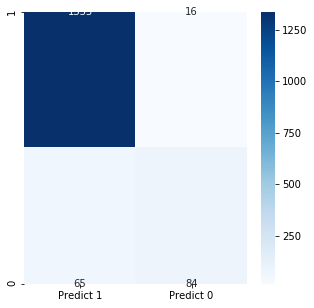

In [106]:
# confusion_matrix
print("confusion_matrix :\n")
cm=metrics.confusion_matrix(y_test, y_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (8,8))
fig = plt.figure(figsize=(5,5))

sns.heatmap(df_cm, annot=True, cmap='Blues', fmt="g")
print(cm)

In [107]:
# Classification report (compute precision, recall, F-measure and support)
print("Classification report (compute precision, recall, F-measure and support) :\n")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification report (compute precision, recall, F-measure and support) :

              precision    recall  f1-score   support

           1       0.84      0.56      0.67       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



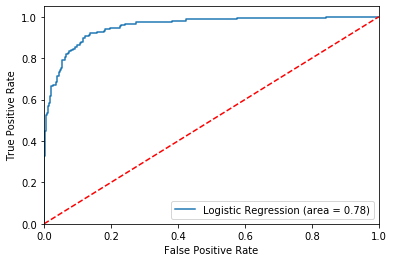

The ROC AUC accuracy 0.9527965861728076


In [108]:
# AUC ROC curve

logit_roc_auc = roc_auc_score(y_test, log_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Calculate the accuracy score
auc_score = metrics.roc_auc_score(y_test, log_model.predict_proba(x_test)[:,1])

# print accuracy score
print(f'The ROC AUC accuracy {auc_score}')

#### K-NN

In [109]:
# convert all attributes to Z scale
XScaled  = x.apply(zscore)

# Spliting the data into training and test set in the ratio of 70:30 respectively
x_train, x_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

# create K-NN Classifier
NNH = KNeighborsClassifier(n_neighbors=17) 

# Train K-NN Classifier model
NNH.fit(x_train, y_train)

# Predict the response for test dataset
y_predict = NNH.predict(x_test)

# Model Accuracy, how often is the classifier correct?
acc_knn= metrics.accuracy_score(y_test, y_predict)

# print accuracy score
print(f'The accuracy of the K-NN classifier is {acc_knn}')

The accuracy of the K-NN classifier is 0.9413333333333334


Confusion Matrix
[[1349    2]
 [  86   63]]


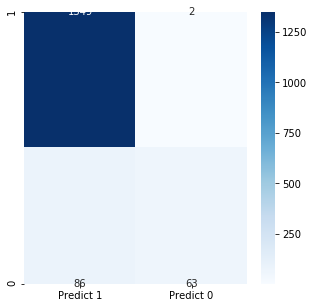

In [110]:
# Confusion Matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (8,8))
fig = plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt="d")
print(cm)

In [111]:
# Classification report (compute precision, recall, F-measure and support)
print("Classification report (compute precision, recall, F-measure and support) :\n")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification report (compute precision, recall, F-measure and support) :

              precision    recall  f1-score   support

           1       0.97      0.42      0.59       149
           0       0.94      1.00      0.97      1351

    accuracy                           0.94      1500
   macro avg       0.95      0.71      0.78      1500
weighted avg       0.94      0.94      0.93      1500



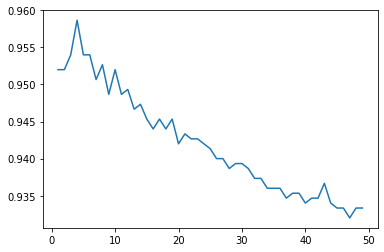

In [112]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))
    
plt.plot(range(1,50),scores)

Text(0, 0.5, 'Mean Error')

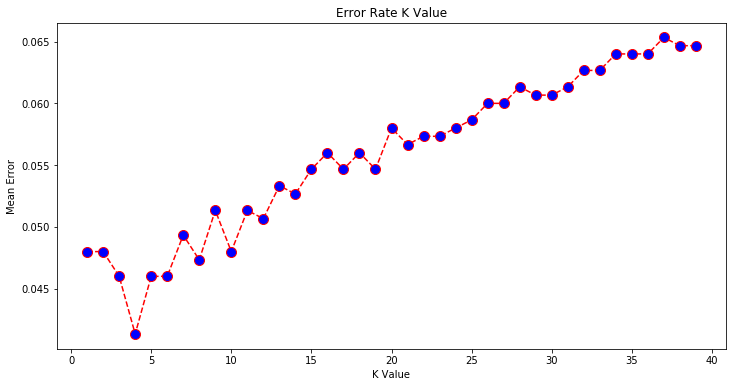

In [113]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Choosing value 17 as a K.

#### Naïve Bayes

In [114]:
# using Gaussian algorithm from Naive Bayes

# Spliting the data into training and test set in the ratio of 70:30 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# create Naive Bayes GaussianNB Classifier
gb = GaussianNB()

# Train GaussianNB Classifier algorithm
gb.fit(x_train, y_train.ravel())

# Predict the response for test dataset
y_predict = gb.predict(x_test)

# Model Accuracy, how often is the classifier correct?
acc_nb=metrics.accuracy_score(y_test, y_predict)

print(f"The accuracy of the K-NN classifier is: {acc_nb}")

The accuracy of the K-NN classifier is: 0.8746666666666667


Confusion Matrix
[[1228  123]
 [  65   84]]


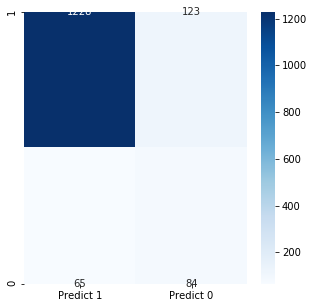

In [115]:
# Confusion Matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (8,8))
fig = plt.figure(figsize=(5,5))

sns.heatmap(df_cm, annot=True, cmap='Blues', fmt="d")
print(cm)

In [116]:
# Classification report (compute precision, recall, F-measure and support)
print("Classification report (compute precision, recall, F-measure and support) :\n")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification report (compute precision, recall, F-measure and support) :

              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



### 7. Give your reasoning on which is the best model in this case and why it performs better?

In [117]:
classifiers = {'Logistic Regression':{'Accuracy': acc_log}, 'K-NN': {'Accuracy': acc_knn}, 'Naive Bayes': {'Accuracy': acc_nb}}
pd.DataFrame.from_dict(classifiers)

,Logistic Regression,K-NN,Naive Bayes
Accuracy,0.946,0.941333,0.874667


The <b>logistic Regression</b> model is the best in accuracy. The precsion and recall accuracy is also good. The confusion matrix looks better in comparision to other models.

According to the score, <b>K-NN</b> looks the good model in this case. The requirement is to classify the target. The K-NN is distance based which is not perfect in this situation, though the accuracy is very good.

The <b>Naive Bayes - Gaussian</b> model is giving the less accuracy in comaprision to other models, meaning the probability of determing the target correctly is less.

<b>Conclusion: </b>We can choose <b>logistic Regression</b> as our final model.

<hr/><hr/>

### In addition, trying to use other classifiers:

#### Decision treee

In [118]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc.fit(x_train,y_train)

# Predict the response for test dataset
y_predict = dtc.predict(x_test)

# Model Accuracy, how often is the classifier correct?
acc_dtc=metrics.accuracy_score(y_test, y_predict)
print(f"The accuracy of the Decision Tree classifier is: {acc_dtc}")

The accuracy of the Decision Tree classifier is: 0.9786666666666667


Confusion Matrix

[[1337   14]
 [  18  131]]


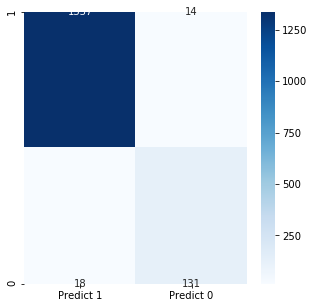

In [119]:
print("Confusion Matrix\n")
cm=metrics.confusion_matrix(y_test, y_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (8,8))
fig = plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt="d")
print(cm)

In [120]:
print("Classification report (compute precision, recall, F-measure and support) :\n")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification report (compute precision, recall, F-measure and support) :

              precision    recall  f1-score   support

           1       0.90      0.88      0.89       149
           0       0.99      0.99      0.99      1351

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



#### SVM

In [121]:
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
svc = svm.SVC(gamma=0.025, C=3)    

# Train Decision Tree Classifer
svc.fit(x_train,y_train)

# Predict the response for test dataset
y_predict = svc.predict(x_test)

# Model Accuracy, how often is the classifier correct?
acc_dtc=metrics.accuracy_score(y_test, y_predict)
print(f"Model Accuracy: {acc_dtc}")

Model Accuracy: 0.9273333333333333


Confusion Matrix
[[1340   11]
 [  98   51]]


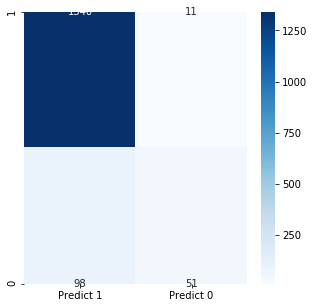

In [122]:
# Confusion Matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (8,8))
fig = plt.figure(figsize=(5,5))

sns.heatmap(df_cm, annot=True, cmap='Blues', fmt="d")
print(cm)

In [123]:
print("Classification report (compute precision, recall, F-measure and support) :\n")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification report (compute precision, recall, F-measure and support) :

              precision    recall  f1-score   support

           1       0.82      0.34      0.48       149
           0       0.93      0.99      0.96      1351

    accuracy                           0.93      1500
   macro avg       0.88      0.67      0.72      1500
weighted avg       0.92      0.93      0.91      1500

